Bell state are specifice quantum states of two qubits that represents the simplest (and maximal) examples of quatnum entanglement. Bell states are form of entangled and normalized basis vectors i.e., sum of their probabilities equals to 1.

In [1]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

In [2]:
simulator_q = Aer.get_backend('qasm_simulator')
simulator_s= Aer.get_backend('statevector_simulator')
simulator_u = Aer.get_backend('unitary_simulator')

## Design a Bell Circuit

outputstate:
 [0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]
UnitaryMatrix:
 [[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]]
counts:
 {'11': 491, '00': 533}


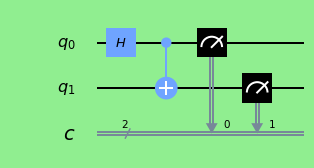

In [3]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1],[0,1])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

In [4]:
from qiskit.extensions.standard.ch import HGate
from qiskit.extensions.standard.iden import IdGate
from qiskit.extensions.standard.cx import CnotGate

print ("Identity: \n", IdGate().to_matrix().real )
print ()
print ("Hadamard: \n", HGate().to_matrix().real )
print ()
print ("CNOT: \n", CnotGate().to_matrix().real)

Identity: 
 [[1. 0.]
 [0. 1.]]

Hadamard: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

CNOT: 
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


Unitary Operator:

Order is CNOT $\otimes$ H.
$=1/\sqrt{2}\begin{bmatrix} 1 & 0 & 0 & 0 \\
                  0 & 0 & 0 & 1 \\
                  0 & 0 & 1 & 0 \\
                  0 & 1 & 0 & 0 \end{bmatrix} \begin{bmatrix} 1 & 1 & 0 & 0 \\
                  1 & -1 & 0 & 0 \\
                  0 & 0 & 1 & 1 \\
                  0 & 0 & 1 & -1 \end{bmatrix}=1/\sqrt{2}\begin{bmatrix} 1 & 1 & 0 & 0 \\
                  0 & 0 & 1 & -1 \\
                  0 & 0 & 1 & 1 \\
                  1 & -1 & 0 & 0 \end{bmatrix}$

This unitary operator operates on the initial state |00> to give final result.
$1/\sqrt{2}\begin{bmatrix} 1 & 1 & 0 & 0 \\
                  0 & 0 & 1 & -1 \\
                  0 & 0 & 1 & 1 \\
                  1 & -1 & 0 & 0 \end{bmatrix} \begin{bmatrix} 1\\0\\0\\0\\
\end{bmatrix}=1/\sqrt{2}\begin{bmatrix} 1\\0\\0\\1\\
\end{bmatrix}$ \

This final matrix is a superposition of two states:
$\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11>$


Manual approach:\
initial state = |00>\
After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10>$

After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11>$ (Since CNOT flips 0 to 1 if first qubit is 1)

### Bellstate with two H and CNOTS

outputstate:
 [ 0.5+0.j -0.5+0.j  0.5+0.j  0.5+0.j]
UnitaryMatrix:
 [[ 0.5+0.j  0.5+0.j  0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j  0.5+0.j  0.5+0.j]
 [ 0.5+0.j -0.5+0.j  0.5+0.j  0.5+0.j]
 [ 0.5+0.j  0.5+0.j -0.5+0.j  0.5+0.j]]
counts:
 {'11': 260, '01': 258, '00': 258, '10': 248}


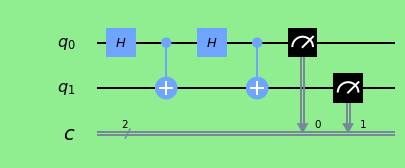

In [5]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.h(0)
circuit.cx(0,1)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1],[0,1])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

Manual approach:\
initial state = |00>\
After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|10>$

After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11>$ (Since CNOT flips 0 to 1 if first qubit is 1)

After Applying another H: $\frac{1}{2}|00> + \frac{1}{2}|10>+ \frac{1}{2}|01>  - \frac{1}{2}|11>$

After applying another CNOT: $\frac{1}{2}|00>+ \frac{1}{2}|11> + \frac{1}{2}|01>  - \frac{1}{2}|10>$

### Bell State with Three H and C-NOTs

outputstate:
 [0.   +0.j 0.   +0.j 0.707+0.j 0.707+0.j]
UnitaryMatrix:
 [[ 0.        +0.j  0.70710678+0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j -0.70710678+0.j  0.70710678+0.j  0.        +0.j]
 [ 0.70710678+0.j  0.        +0.j  0.        +0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]]
counts:
 {'11': 494, '10': 530}


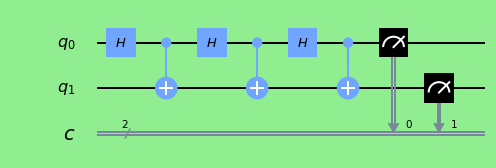

In [6]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0,1)
circuit.h(0)
circuit.cx(0,1)
circuit.h(0)
circuit.cx(0,1)
#Statevector part
result3=execute(circuit,simulator_s).result()
outputstate = result3.get_statevector(circuit, decimals=3)
print ('outputstate:\n',outputstate)
#unitary vector part
result=execute(circuit,simulator_u).result()
unitary=result.get_unitary(circuit)
print ('UnitaryMatrix:\n',unitary)
#Now Quasm Simulator part where we need to measure
circuit.measure([0,1],[0,1])
result2=execute(circuit,simulator_q).result()
print ("counts:\n",result2.get_counts(circuit))
style = {'backgroundcolor': 'lightgreen'}
circuit.draw(output='mpl',style=style)

Manual approach:\
Outer zero is first bit and inner zero is second bit.\
initial state = |00>\
After application of Hadamard Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|01>$

After application of CNOT Gate: $\frac{1}{\sqrt{2}}|00> + \frac{1}{\sqrt{2}}|11>$ (Since CNOT flips 0 to 1 if first qubit is 1)


After Applying another H: $\frac{1}{2}|00>+ \frac{1}{2}|01> + \frac{1}{2}|10>  - \frac{1}{2}|11>$


After applying another CNOT: $\frac{1}{2}|00> + \frac{1}{2}|01>+ \frac{1}{2}|11>  - \frac{1}{2}|10>$

After applying another H: $\frac{1}{2\sqrt{2}}[|00> + |01> + |10> -|11> + |10> + |11> - |00> +|01>]\\
=\frac{1}{\sqrt{2}}[ |01>+|10> ]$

After applying another CNOT: $\frac{1}{\sqrt{2}}[ |11> + |10>]$